# **Problem statement 4**

Perform the following operations using Python
1. Scan all numeric variables for outliers. If there are outliers, use the following techniques to
deal with them. a)min max normalization b)z-score normalization c)Box plot

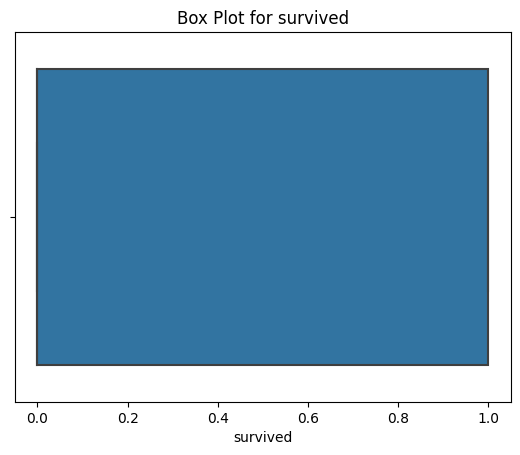

Min-max normalized survived:
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: survived_minmax, Length: 891, dtype: float64

Z-score normalized survived:
0     -0.788829
1      1.266279
2      1.266279
3      1.266279
4     -0.788829
         ...   
886   -0.788829
887    1.266279
888   -0.788829
889    1.266279
890   -0.788829
Name: survived_zscore, Length: 891, dtype: float64

survived without outliers:
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived_no_outliers, Length: 891, dtype: int64



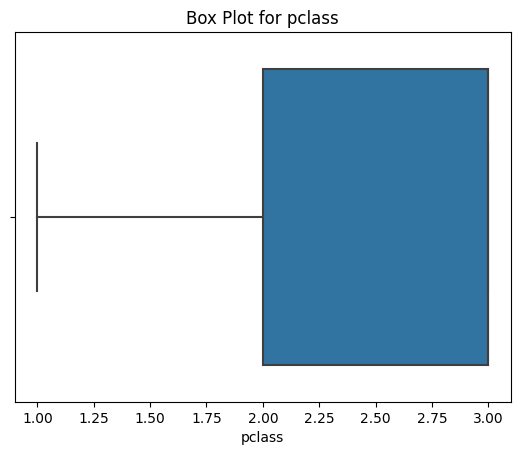

Min-max normalized pclass:
0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
886    0.5
887    0.0
888    1.0
889    0.0
890    1.0
Name: pclass_minmax, Length: 891, dtype: float64

Z-score normalized pclass:
0      0.826913
1     -1.565228
2      0.826913
3     -1.565228
4      0.826913
         ...   
886   -0.369158
887   -1.565228
888    0.826913
889   -1.565228
890    0.826913
Name: pclass_zscore, Length: 891, dtype: float64

pclass without outliers:
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass_no_outliers, Length: 891, dtype: int64



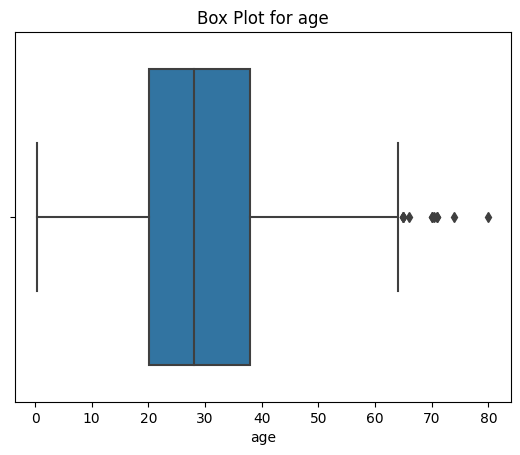

Min-max normalized age:
0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: age_minmax, Length: 891, dtype: float64

Z-score normalized age:
0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age_zscore, Length: 891, dtype: float64

age without outliers:
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age_no_outliers, Length: 891, dtype: float64



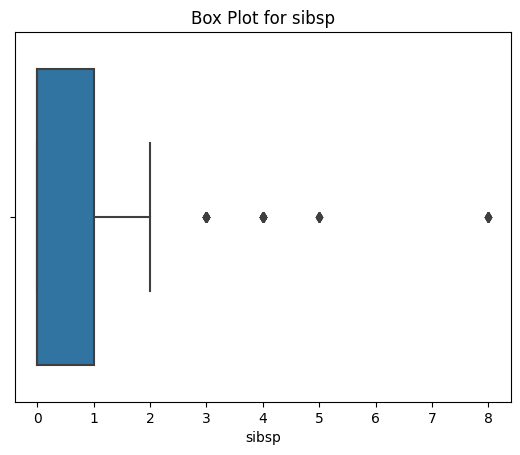

Min-max normalized sibsp:
0      0.125
1      0.125
2      0.000
3      0.125
4      0.000
       ...  
886    0.000
887    0.000
888    0.125
889    0.000
890    0.000
Name: sibsp_minmax, Length: 891, dtype: float64

Z-score normalized sibsp:
0      0.432550
1      0.432550
2     -0.474279
3      0.432550
4     -0.474279
         ...   
886   -0.474279
887   -0.474279
888    0.432550
889   -0.474279
890   -0.474279
Name: sibsp_zscore, Length: 891, dtype: float64

sibsp without outliers:
0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
886    0.0
887    0.0
888    1.0
889    0.0
890    0.0
Name: sibsp_no_outliers, Length: 891, dtype: float64



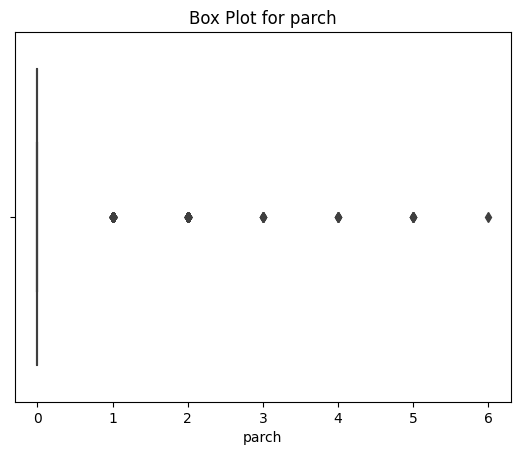

Min-max normalized parch:
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
886    0.000000
887    0.000000
888    0.333333
889    0.000000
890    0.000000
Name: parch_minmax, Length: 891, dtype: float64

Z-score normalized parch:
0     -0.473408
1     -0.473408
2     -0.473408
3     -0.473408
4     -0.473408
         ...   
886   -0.473408
887   -0.473408
888    2.007806
889   -0.473408
890   -0.473408
Name: parch_zscore, Length: 891, dtype: float64

parch without outliers:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    NaN
889    0.0
890    0.0
Name: parch_no_outliers, Length: 891, dtype: float64



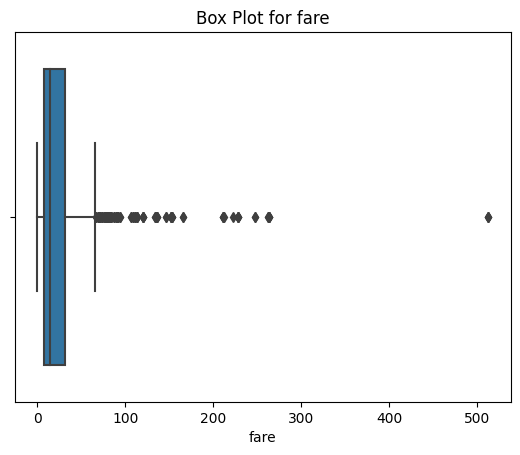

Min-max normalized fare:
0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: fare_minmax, Length: 891, dtype: float64

Z-score normalized fare:
0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: fare_zscore, Length: 891, dtype: float64

fare without outliers:
0       7.250
1         NaN
2       7.925
3      53.100
4       8.050
        ...  
886    13.000
887    30.000
888    23.450
889    30.000
890     7.750
Name: fare_no_outliers, Length: 891, dtype: float64



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming it is stored in a DataFrame called 'df')
df = sns.load_dataset("titanic")

# Identify numeric variables in the dataset
numeric_variables = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Scan numeric variables for outliers using box plots
for var in numeric_variables:
    # Create a box plot for the variable
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot for {var}')
    plt.show()

    # Identify outliers based on the box plot
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Handle outliers using different techniques
    # a) Min-max normalization
    df[var + '_minmax'] = (df[var] - df[var].min()) / (df[var].max() - df[var].min())

    # b) Z-score normalization
    df[var + '_zscore'] = (df[var] - df[var].mean()) / df[var].std()

    # c) Remove outliers
    df[var + '_no_outliers'] = df[var][(df[var] >= lower_bound) & (df[var] <= upper_bound)]

    # Display the modified variables
    print(f"Min-max normalized {var}:")
    print(df[var + '_minmax'])
    print()

    print(f"Z-score normalized {var}:")
    print(df[var + '_zscore'])
    print()

    print(f"{var} without outliers:")
    print(df[var + '_no_outliers'])
    print()


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,age_no_outliers,sibsp_minmax,sibsp_zscore,sibsp_no_outliers,parch_minmax,parch_zscore,parch_no_outliers,fare_minmax,fare_zscore,fare_no_outliers
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,22.0,0.125,0.432550,1.0,0.000000,-0.473408,0.0,0.014151,-0.502163,7.250
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,38.0,0.125,0.432550,1.0,0.000000,-0.473408,0.0,0.139136,0.786404,NaN
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,26.0,0.000,-0.474279,0.0,0.000000,-0.473408,0.0,0.015469,-0.488580,7.925
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,35.0,0.125,0.432550,1.0,0.000000,-0.473408,0.0,0.103644,0.420494,53.100
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,35.0,0.000,-0.474279,0.0,0.000000,-0.473408,0.0,0.015713,-0.486064,8.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,27.0,0.000,-0.474279,0.0,0.000000,-0.473408,0.0,0.025374,-0.386454,13.000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,19.0,0.000,-0.474279,0.0,0.000000,-0.473408,0.0,0.058556,-0.044356,30.000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,NaN,0.125,0.432550,1.0,0.333333,2.007806,NaN,0.045771,-0.176164,23.450
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,26.0,0.000,-0.474279,0.0,0.000000,-0.473408,0.0,0.058556,-0.044356,30.000
